In [2]:
from scipy.linalg import eigh_tridiagonal
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

np.set_printoptions(precision=3, suppress=True)

In [3]:
V0, kl = -800/(np.pi)**2, np.pi

x = np.linspace(0, 1, 1001)
V = V0 * np.sin(np.pi * x) ** 2

In [4]:
l_max = 10
l = np.arange(-l_max, l_max+1)

In [5]:
q = np.pi/2
E, phi = eigh_tridiagonal( (2 * l + q/kl) ** 2 + V0/2, -V0/4 * np.ones(len(l) - 1))

In [6]:
def to_pos_basis(phi_l, kl, l, x):
    def phi_x(x):
        return (1/np.sqrt(2*np.pi)) * np.sum(phi_l * np.exp(2j * kl * x * l))
    
    return [phi_x(xi) for xi in x]

In [7]:
psi = [to_pos_basis(phi_i, kl, l, x) for phi_i in phi.T]

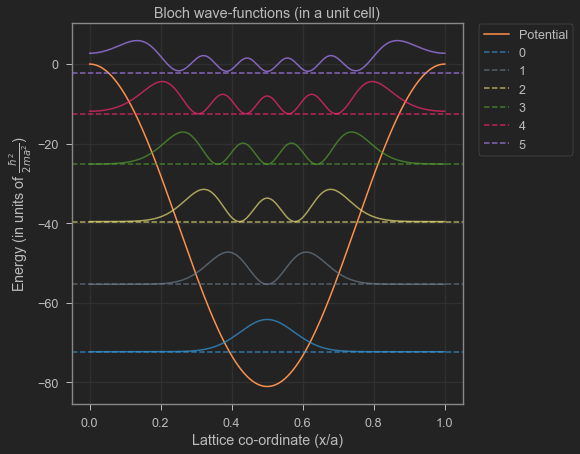

In [8]:
fig = plt.figure(figsize = (7, 7))
plt.plot(x, V, c = "C4", label = "Potential")

for i in range(np.argmax(E > 0)):
    prob = np.abs(psi[i])**2
    plt.plot(x, E[i] + 0.1 * np.max(-V)/np.max(prob) * prob, c = f"C{i + 12}", alpha = 0.7)
    plt.axhline(E[i], c = f"C{i + 12}", ls = "dashed", alpha = 0.7, label = f"{i}")

plt.legend(bbox_to_anchor=(1.025, 1.015))
plt.title("Bloch wave-functions (in a unit cell)")
plt.xlabel("Lattice co-ordinate (x/a)")
plt.ylabel(r"Energy (in units of $\frac{\hbar^2}{2ma^2}$)");

In [22]:
print(np.real(E) * np.pi**2)

[-339.746 -224.96  -123.047  -39.028   30.059  116.867  229.561  364.445
  520.239  696.433  892.774 1109.123 1345.393 1601.533 1877.507 2173.292
 2488.869 2824.345 3179.459 3566.491 3960.589]
